## IMPORTING LIBRARIES

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [35]:
df = pd.read_csv('adaniports .csv',parse_dates=['Date'])
df

,Date,Prev Close,Open,High,Low,Last,Close
0,2007-11-27,440.00,770.00,1050.00,770.00,959.0,962.90
1,2007-11-28,962.90,984.00,990.00,874.00,885.0,893.90
2,2007-11-29,893.90,909.00,914.75,841.00,887.0,884.20
3,2007-11-30,884.20,890.00,958.00,890.00,929.0,921.55
4,2007-03-12,921.55,939.75,995.00,922.00,980.0,969.30
...,...,...,...,...,...,...,...
3317,2021-04-26,725.35,733.00,739.65,728.90,729.2,730.75
3318,2021-04-27,730.75,735.00,757.50,727.35,748.6,749.15
3319,2021-04-28,749.15,755.00,760.00,741.10,743.4,746.25
3320,2021-04-29,746.25,753.20,765.85,743.40,746.4,746.75


In [87]:
df['Date'] = pd.to_datetime(df['Date'])

<AxesSubplot:>

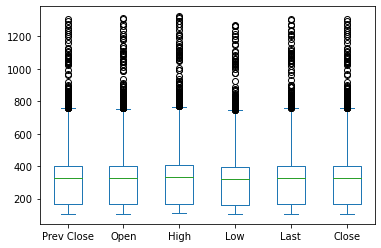

In [93]:
df[['Prev Close' ,'Open' ,'High' ,'Low' ,'Last' ,'Close']].plot(kind='box')

<AxesSubplot:xlabel='Date', ylabel='Close'>

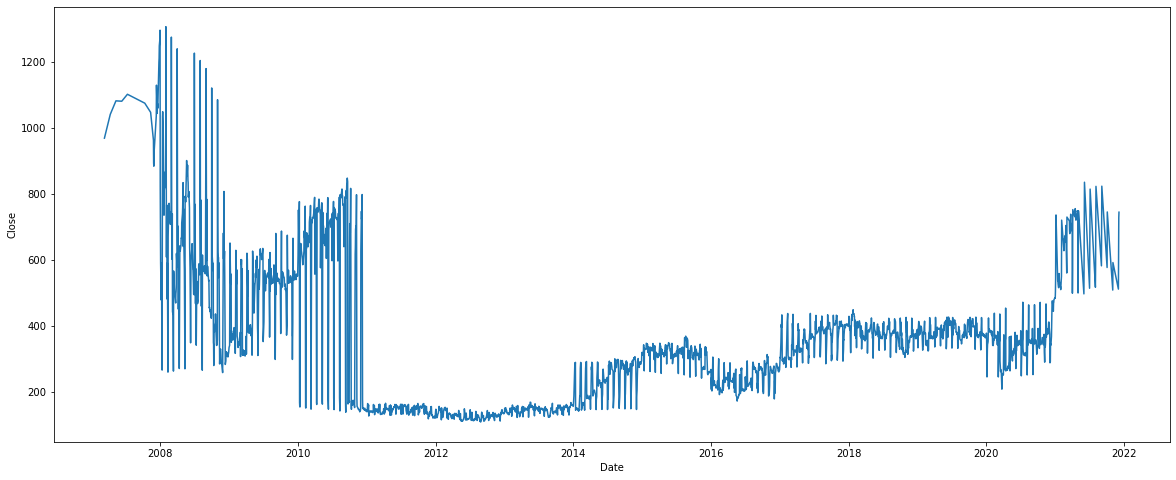

In [37]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=0)
sns.lineplot(data = df, x='Date' , y='Close')

<AxesSubplot:xlabel='Date', ylabel='Close'>

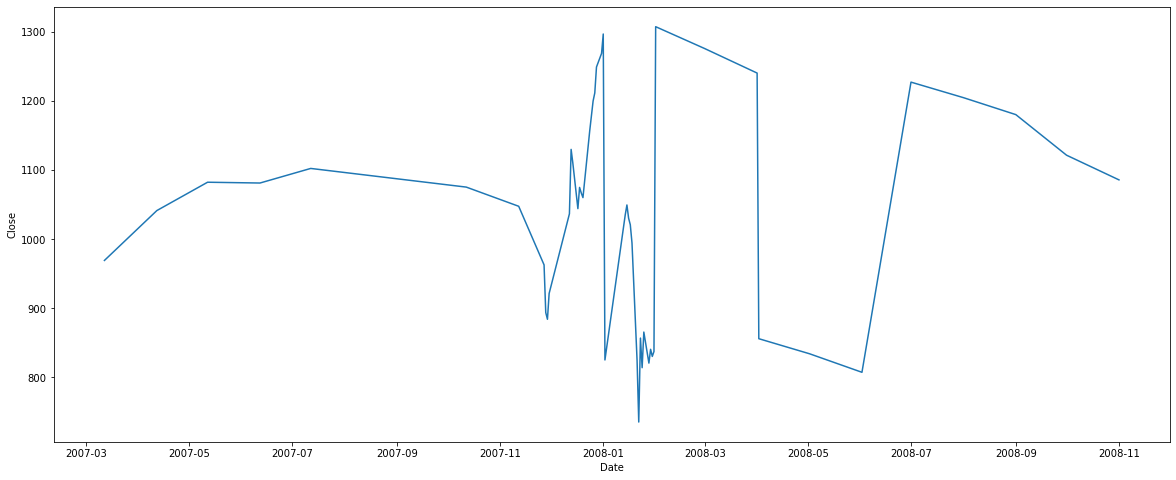

In [38]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=0)
sns.lineplot(data = df.head(50), x='Date' , y='Close')

## SPLIT THE DATASET 

In [39]:
x = df.iloc[:,2:-1].values
y = df.iloc[:,-1].values

In [40]:
x

array([[ 770.  , 1050.  ,  770.  ,  959.  ],
       [ 984.  ,  990.  ,  874.  ,  885.  ],
       [ 909.  ,  914.75,  841.  ,  887.  ],
       ...,
       [ 755.  ,  760.  ,  741.1 ,  743.4 ],
       [ 753.2 ,  765.85,  743.4 ,  746.4 ],
       [ 739.  ,  759.45,  724.5 ,  726.4 ]])

In [41]:
y

array([962.9 , 893.9 , 884.2 , ..., 746.25, 746.75, 730.05])

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# RANDOM FOREST REGRESSION

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [44]:
#Comparing predicted and test values

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[115.33 116.6 ]
 [150.7  151.85]
 [343.52 345.15]
 ...
 [409.43 410.2 ]
 [163.21 161.9 ]
 [110.47 110.25]]


### Checking Precision Of Model

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9998572968928502

ACTUAL VALUES                          

2021-04-26                 725.35,733.00,739.65,728.90,729.2   ...............          CLOSE===      730.75

In [46]:
regressor.predict([[733.00,739.65,728.90,729.2]])

array([728.9])

# SVR(Support Vector Regression) MODEL

# 1st Model

In [47]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf', C=1000)               # C= free parameter or regularised parameter 
reg.fit(x, y)

SVR(C=1000)

In [48]:
y_pred = reg.predict(x)

### Accuracy check using R-Square method

In [49]:
from sklearn.metrics import mean_squared_error
score = reg.score(x,y)
print("R-squared:", score)
print("MSE:", mean_squared_error(y, y_pred))

R-squared: 0.9999473681782811
MSE: 1.9608246306385566


----ACTUAL VALUES

2021-04-26 725.35,733.00,739.65,728.90,729.2 ............... Close=== 730.75

In [50]:
reg.predict([[733.00,739.65,728.90,729.2]])

array([730.16])

# 2nd model

In [51]:
from sklearn.svm import SVR
regre = SVR(kernel = 'poly', C=1000)               # C= free parameter or regularised parameter 
regre.fit(x, y)

SVR(C=1000, kernel='poly')

In [52]:
y_pre = regre.predict(x)

### Accuracy check using R-Square method

In [53]:
from sklearn.metrics import mean_squared_error
score = regre.score(x,y)
print("R-squared:", score)
print("MSE:", mean_squared_error(y, y_pre))

R-squared: 0.5610754641076869
MSE: 16352.351350592115


In [54]:
regre.predict([[733.00,739.65,728.90,729.2]])

array([805.63])

#  Predict price of stock using given features

In [70]:
#stcp = (939.75, 995.00 ,922.00 ,980.0)

stcp = (939.75, 995.00 ,922.00 ,980.0)
stc = np.asarray(stcp)
stc_p = stc.reshape(1,-1)
print('The predicted price by Random Forest :',regressor.predict(stc_p))
print('The predicted price by 1st Model of SVR :',reg.predict(stc_p))
print('The predicted price by 2nd Model of SVR :',regre.predict(stc_p))

The predicted price by Random Forest : [950.74]
The predicted price by 1st Model of SVR : [969.42]
The predicted price by 2nd Model of SVR : [1334.56]


So, the 1st Model of SVR is the best fitting model for Stock Market Prediction

In [86]:
dp =df.iloc[4,:]
dp

Date          2007-03-12 00:00:00
Prev Close                 921.55
Open                       939.75
High                        995.0
Low                         922.0
Last                        980.0
Close                       969.3
Name: 4, dtype: object